## Social Media Sentiment Analysis

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import string
import nltk
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
Trainset=pd.read_csv('traindata.csv')
Testset=pd.read_csv('testdata.csv')

In [3]:
Trainset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
Testset.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
combined = pd.concat([Trainset,Testset])
combined.sort_values(by='id')

In [7]:
combined.shape

(49159, 3)

## Data Pre-Processing

### Removing Twitter Handles,Punctuations, Numbers, and Special Characters

In [8]:
combined['tidy_tweet'] = combined['tweet'].str.replace("@[\w]*", " ")
combined['tidy_tweet'] = combined['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [9]:
combined.head(10)

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause ...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [10]:
combined['tidy_tweet']=combined['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combined

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
17192,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
17193,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
17194,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio used words li...
17195,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset leads cult...


### Tokenization

In [12]:
tokenize_tweet = combined['tidy_tweet'].apply(lambda x: x.split(' '))
tokenize_tweet

0        [when, father, dysfunctional, selfish, drags, ...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
17192    [thought, factory, left, right, polarisation, ...
17193    [feeling, like, mermaid, #hairflip, #neverread...
17194    [#hillary, #campaigned, today, #ohio, used, wo...
17195    [happy, work, conference, right, mindset, lead...
17196    [song, glad, free, download, #shoegaze, #newmu...
Name: tidy_tweet, Length: 49159, dtype: object

### Lemmatization

In [13]:
wnlemma = nltk.WordNetLemmatizer()
tokenize_tweet = combined['tidy_tweet'].apply(lambda x: [wnlemma.lemmatize(t) for t in x.split(' ')])

In [14]:
tokenize_tweet

0        [when, father, dysfunctional, selfish, drag, k...
1        [thanks, #lyft, credit, cause, they, offer, wh...
2                                  [bihday, your, majesty]
3                         [#model, love, take, with, time]
4                       [factsguide, society, #motivation]
                               ...                        
17192    [thought, factory, left, right, polarisation, ...
17193    [feeling, like, mermaid, #hairflip, #neverread...
17194    [#hillary, #campaigned, today, #ohio, used, wo...
17195    [happy, work, conference, right, mindset, lead...
17196    [song, glad, free, download, #shoegaze, #newmu...
Name: tidy_tweet, Length: 49159, dtype: object

In [15]:
combined['tidy_tweet']= tokenize_tweet.apply(lambda x: ' '.join(t for t in x))
combined['tidy_tweet']

0        when father dysfunctional selfish drag kid int...
1        thanks #lyft credit cause they offer wheelchai...
2                                      bihday your majesty
3                               #model love take with time
4                           factsguide society #motivation
                               ...                        
17192    thought factory left right polarisation #trump...
17193    feeling like mermaid #hairflip #neverready #fo...
17194    #hillary #campaigned today #ohio used word lik...
17195    happy work conference right mindset lead cultu...
17196    song glad free download #shoegaze #newmusic #n...
Name: tidy_tweet, Length: 49159, dtype: object

In [16]:
combined

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drag kid int...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
17192,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
17193,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
17194,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio used word lik...
17195,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset lead cultu...


# Visualization

In [17]:
negative_words=[]
for index,row in combined.iterrows():
    if row['label']==1 :
        negative_words.append(row['tidy_tweet'])
positive_words=[]
for index,row in combined.iterrows():
    if row['label']==0 :
        positive_words.append(row['tidy_tweet'])

In [21]:
def hastags(x):
    ht=[]
    for i in x:
        
        r=re.findall('#[\w]+',i)
        ht.append(r)
    
    return ht

positive_hastags=hastags(combined['tidy_tweet'][combined['label']==0])
negative_hastags=hastags(combined['tidy_tweet'][combined['label']==1])

In [22]:
positive_hastags_unnest=sum(positive_hastags,[])
negative_hastags_unnest=sum(negative_hastags,[])

In [23]:
freq_positive_words=nltk.FreqDist(positive_hastags_unnest)
freq_positive_words

FreqDist({'#love': 1596, '#positive': 880, '#smile': 581, '#healthy': 576, '#thankful': 496, '#fun': 463, '#life': 431, '#summer': 395, '#model': 365, '#cute': 365, ...})

### Frequency of hashtag words having Negative Sentiment

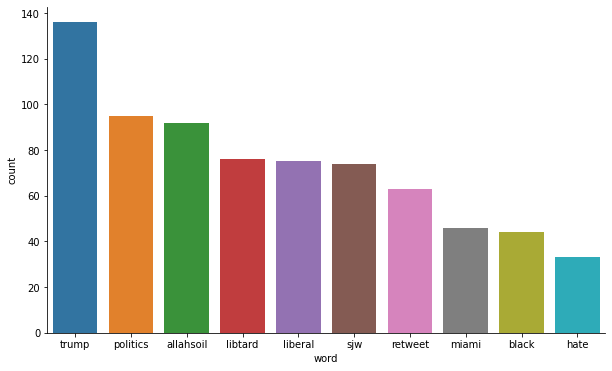

In [26]:
freq_negative_words=nltk.FreqDist(negative_hastags_unnest)
sorted_tuple_list= sorted(freq_negative_words.items(),key = lambda x: x[1],reverse=True)
word=[]
count=[]
for m,n in sorted_tuple_list:
    word.append(m)
    count.append(n)
updated_word= [re.sub('#','',w) for w in word ]
df_negative=pd.DataFrame({
                  'word':updated_word,
                    'count': count})
df_negative_plot = df_negative.nlargest(10,columns='count')
fig_dims=(10,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df_negative_plot,x='word',y='count',ax=ax)
sns.despine()

### Frequency of hastag words having Positive Sentiment

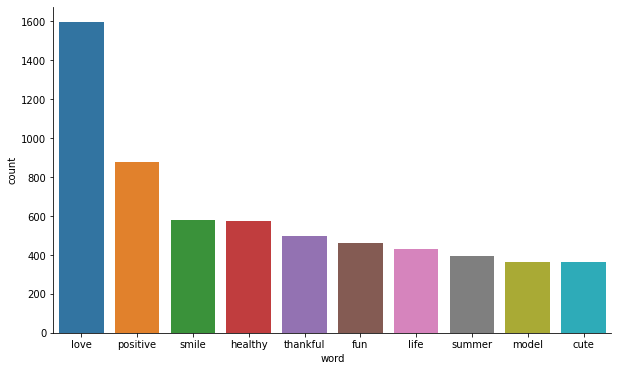

In [27]:
freq_positive_words=nltk.FreqDist(positive_hastags_unnest)
sorted_tuple_list= sorted(freq_positive_words.items(),key = lambda x: x[1],reverse=True)
word=[]
count=[]
for m,n in sorted_tuple_list:
    word.append(m)
    count.append(n)
updated_word= [re.sub('#','',w) for w in word ]
df_positive=pd.DataFrame({
                  'word':updated_word,
                    'count': count})
df_positive_plot = df_positive.nlargest(10,columns='count')
fig_dims=(10,6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(data=df_positive_plot,x='word',y='count',ax=ax)
sns.despine()

## Features Extraction(TF-IDF Features)

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')
tfidf_matrix=tfidf.fit_transform(combined['tidy_tweet'])
df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
train_tfidf_matrix = tfidf_matrix[:31962]
train_tfidf_matrix.todense()


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
from sklearn.model_selection import train_test_split
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,Trainset['label'],test_size=0.3,random_state=17)

## Applying Machine Learning Models

In [31]:
from sklearn.metrics import f1_score

### Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [33]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_tfidf

array([[0.98266666, 0.01733334],
       [0.965336  , 0.034664  ],
       [0.94201272, 0.05798728],
       ...,
       [0.93228516, 0.06771484],
       [0.97536903, 0.02463097],
       [0.98684183, 0.01315817]])

In [35]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int=prediction_int.astype(np.int)
prediction_int

array([0, 0, 0, ..., 0, 0, 0])

#### F1 Score

In [36]:
log_tfidf = f1_score(y_valid_tfidf, prediction_int)
log_tfidf

0.5615589016829052

### Decision Tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [38]:
dct_tfidf=dct.predict_proba(x_valid_tfidf)
dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [39]:
dct_int=dct_tfidf[:,1]>=0.5
dct_int=dct_int.astype(np.int)

#### F1 Score

In [40]:
dct_f1_score=f1_score(y_valid_tfidf,dct_int)
dct_f1_score

0.5472636815920398

### K-Nearest Neighbors

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)
knn_trained = knn.fit(x_train_tfidf,y_train_tfidf)
knn_predict=knn_trained.predict(x_valid_tfidf)


#### F1 Score

In [54]:
knn_f1_score=f1_score(y_valid_tfidf,knn_predict)
knn_f1_score

0.44560669456066954

### Support Vector Classifier

In [73]:
from sklearn.svm import SVC
svc_trained=SVC(kernel='poly',degree=3).fit(x_train_tfidf,y_train_tfidf)
svc_predict=svc_trained.predict(x_valid_tfidf)

#### F1 Score

In [74]:
svc_f1_score=f1_score(y_valid_tfidf,svc_predict)
svc_f1_score

0.5359056806002144

### Model Comparison

In [85]:
Algo=['LogisticRegression','DecisionTree','KNearestNeighbors','SVC']
score = [log_tfidf,dct_f1_score,knn_f1_score,svc_f1_score]
compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[1,2,3,4]).T
compare

,1,2,3,4
Model,LogisticRegression,DecisionTree,KNearestNeighbors,SVC
F1_Score,0.561559,0.547264,0.445607,0.535906


### Applying Logistic Regression (highest F1 score) for sentiment prediction

In [92]:
test_tfidf_matrix = tfidf_matrix[31962:]
test_pred = Log_Reg.predict_proba(test_tfidf_matrix)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(np.int)
Testset['label'] = test_pred_int
Testset.drop(index)

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,1
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
...,...,...,...
17191,49154,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,0
17192,49155,thought factory: left-right polarisation! #tru...,1
17193,49156,feeling like a mermaid ð #hairflip #neverre...,0
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,0
